In [1]:
import numpy as np 
import cv2
import glob
import os
import matplotlib.pyplot as plt
import string
from mlxtend.plotting import plot_decision_regions
from mpl_toolkits.mplot3d import Axes3D
#from sklearn.decomposition import PCA
#from sklearn.preprocessing import StandardScaler
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.tree import DecisionTreeClassifier 
#from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils.multiclass import unique_labels
#from sklearn import metrics
#from sklearn.svm import SVC

print(os.listdir("C:/Users/bhupe/Desktop/My Project"))
dim = 100

['3.Fruit_image_classification', 'car_bicycle', 'Gender Classification', 'Mask-Detector']


In [2]:

import tensorflow as tf
from tensorflow import keras

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [3]:
def getYourFruits(fruits, data_type, print_n=False, k_fold=False):
    images = []
    labels = []
    val = ['Training', 'Test','test-multiple_fruits']
    if not k_fold:
        path = "C:/Users/bhupe/Desktop/My Project/*/fruits-360/" + data_type + "/"
        for i,f in enumerate(fruits):
            p = path + f
            j=0
            for image_path in glob.glob(os.path.join(p, "*.jpg")):
                image = cv2.imread(image_path, cv2.IMREAD_COLOR)
                image = cv2.resize(image, (dim, dim))
                image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
                images.append(image)
                labels.append(i)
                j+=1
            if(print_n):
                print("There are " , j , " " , data_type.upper(), " images of " , fruits[i].upper())
        images = np.array(images)
        labels = np.array(labels)
        return images, labels
    else:
        for v in val:
            path = "C:/Users/bhupe/Desktop/My Project/*/fruits-360/" + v + "/"
            for i,f in enumerate(fruits):
                p = path + f
                j=0
                for image_path in glob.glob(os.path.join(p, "*.jpg")):
                    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
                    image = cv2.resize(image, (dim, dim))
                    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
                    images.append(image)
                    labels.append(i)
                    j+=1
        images = np.array(images)
        labels = np.array(labels)
        return images, labels

In [4]:
def getAllFruits():
    fruits = []
    for fruit_path in glob.glob("C:/Users/bhupe/Desktop/My Project/*/fruits-360/Training/*"):
        fruit = fruit_path.split("/")[-1]
        fruits.append(fruit)
    return fruits

In [5]:
getAllFruits()

['My Project\\3.Fruit_image_classification\\fruits-360\\Training\\Apple Braeburn',
 'My Project\\3.Fruit_image_classification\\fruits-360\\Training\\Apple Crimson Snow',
 'My Project\\3.Fruit_image_classification\\fruits-360\\Training\\Apple Golden 1',
 'My Project\\3.Fruit_image_classification\\fruits-360\\Training\\Apple Golden 2',
 'My Project\\3.Fruit_image_classification\\fruits-360\\Training\\Apple Golden 3',
 'My Project\\3.Fruit_image_classification\\fruits-360\\Training\\Apple Granny Smith',
 'My Project\\3.Fruit_image_classification\\fruits-360\\Training\\Apple Pink Lady',
 'My Project\\3.Fruit_image_classification\\fruits-360\\Training\\Apple Red 1',
 'My Project\\3.Fruit_image_classification\\fruits-360\\Training\\Apple Red 2',
 'My Project\\3.Fruit_image_classification\\fruits-360\\Training\\Apple Red 3',
 'My Project\\3.Fruit_image_classification\\fruits-360\\Training\\Apple Red Delicious',
 'My Project\\3.Fruit_image_classification\\fruits-360\\Training\\Apple Red Yellow

In [6]:
#Choose your Fruits
fruits = ['Apple Red 1',
          'Apple Red 2',
          'Apple Red 3',
          'Apple Pink Lady',
          'Apple Red Yellow 1',
          'Apple Red Delicious',
          'Grape White',
          'Grape White 2',
          'Grape White 3',
         'Grape Pink'] #Binary classification

#Get Images and Labels 
X_t, y_train =  getYourFruits(fruits, 'Training', print_n=True, k_fold=False)
X_test, y_test = getYourFruits(fruits, 'Test', print_n=True, k_fold=False)

#Get data for k-fold
#X,y = getYourFruits(fruits, '', print_n=True, k_fold=True)

#Scale Data Images
#flatten the pixels to a single row for each image and constructed a matrix with flattened pixels rows
#scaler = StandardScaler()
#X_train = scaler.fit_transform([i.flatten() for i in X_t])
#X_test = scaler.fit_transform([i.flatten() for i in X_test])
#X = scaler.fit_transform([i.flatten() for i in X])

There are  492   TRAINING  images of  APPLE RED 1
There are  492   TRAINING  images of  APPLE RED 2
There are  429   TRAINING  images of  APPLE RED 3
There are  456   TRAINING  images of  APPLE PINK LADY
There are  492   TRAINING  images of  APPLE RED YELLOW 1
There are  490   TRAINING  images of  APPLE RED DELICIOUS
There are  490   TRAINING  images of  GRAPE WHITE
There are  490   TRAINING  images of  GRAPE WHITE 2
There are  492   TRAINING  images of  GRAPE WHITE 3
There are  492   TRAINING  images of  GRAPE PINK
There are  164   TEST  images of  APPLE RED 1
There are  164   TEST  images of  APPLE RED 2
There are  144   TEST  images of  APPLE RED 3
There are  152   TEST  images of  APPLE PINK LADY
There are  164   TEST  images of  APPLE RED YELLOW 1
There are  166   TEST  images of  APPLE RED DELICIOUS
There are  166   TEST  images of  GRAPE WHITE
There are  166   TEST  images of  GRAPE WHITE 2
There are  164   TEST  images of  GRAPE WHITE 3
There are  164   TEST  images of  GRAPE P

In [7]:
X_t[1]

array([[[255, 253, 255],
        [255, 253, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 253, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [8]:
#source from Github
def plot_image_grid(images, nb_rows, nb_cols, figsize=(10, 10)):
    assert len(images) == nb_rows*nb_cols, "Number of images should be the same as (nb_rows*nb_cols)"
    fig, axs = plt.subplots(nb_rows, nb_cols, figsize=figsize)
    
    n = 0
    for i in range(0, nb_rows):
        for j in range(0, nb_cols):
            # axs[i, j].xaxis.set_ticklabels([])
            # axs[i, j].yaxis.set_ticklabels([])
            axs[i, j].axis('off')
            axs[i, j].imshow(images[n])
            n += 1   

In [9]:
X_t.shape

(4815, 100, 100, 3)

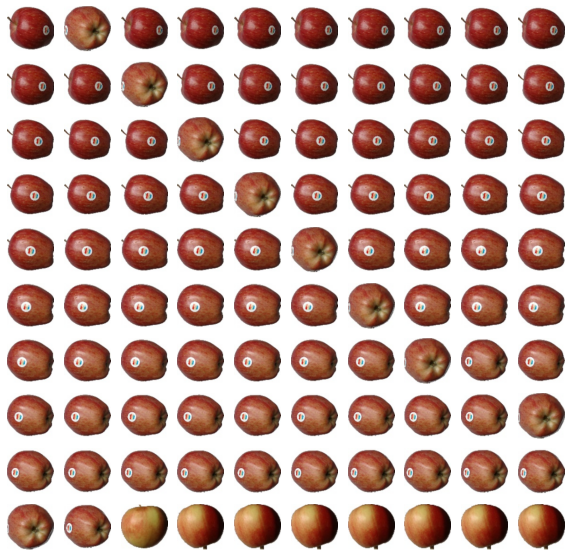

In [10]:

#Slicing a 1D npy array:
#The slice notation specifies a start and end value [start:end] and copies the list from start up to but not including end.
plot_image_grid(X_t[400:500], 10, 10)

### build model

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(100, 100,3)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

### compile the model

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
len(y_train)

4815

In [14]:
#len(X_train)

In [14]:
X_t.shape

(4815, 100, 100, 3)

In [15]:
model.fit(X_t, y_train, epochs=10)

Epoch 1/10
151/151 [==============================] - 8s 36ms/step - loss: 2678.7059 - accuracy: 0.3375
Epoch 2/10
151/151 [==============================] - 5s 35ms/step - loss: 2.0252 - accuracy: 0.2216
Epoch 3/10
151/151 [==============================] - 5s 33ms/step - loss: 1.9584 - accuracy: 0.2561
Epoch 4/10
151/151 [==============================] - 5s 34ms/step - loss: 1.9359 - accuracy: 0.2540
Epoch 5/10
151/151 [==============================] - 5s 32ms/step - loss: 1.9201 - accuracy: 0.2745
Epoch 6/10
151/151 [==============================] - 5s 33ms/step - loss: 1.9214 - accuracy: 0.2684
Epoch 7/10
151/151 [==============================] - 5s 33ms/step - loss: 1.7383 - accuracy: 0.3556
Epoch 8/10
151/151 [==============================] - 6s 43ms/step - loss: 1.5967 - accuracy: 0.3825
Epoch 9/10
151/151 [==============================] - 7s 45ms/step - loss: 1.5649 - accuracy: 0.3835
Epoch 10/10
151/151 [==============================] - 7s 43ms/step - loss: 1.5079 - acc

### evaluate accuracy

In [16]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

51/51 - 1s - loss: 1.7225 - accuracy: 0.3271

Test accuracy: 0.3271375596523285


### Making prediction

In [17]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [18]:
predictions = probability_model.predict(X_test)

In [19]:
predictions[0]

array([0.12409567, 0.12411691, 0.10751244, 0.03878905, 0.12516391,
       0.04804278, 0.12353862, 0.12249433, 0.06202313, 0.12422317],
      dtype=float32)

In [20]:
#show the label that model has the highest confidence
np.argmax(predictions[0])

4

In [21]:
#corresbond test set label
y_test[0]

0

### Grahpic Model Result

In [22]:
# write a function to match the actual test image with the predicted label. Show blue if correctly predicted.
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
 
    plt.xlabel("{} {:2.0f}% \n({})".format(fruits[predicted_label],
                                100*np.max(predictions_array),
                                fruits[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [23]:
X_test, y_test = getYourFruits(fruits, 'Test', print_n=True, k_fold=False)

There are  164   TEST  images of  APPLE RED 1
There are  164   TEST  images of  APPLE RED 2
There are  144   TEST  images of  APPLE RED 3
There are  152   TEST  images of  APPLE PINK LADY
There are  164   TEST  images of  APPLE RED YELLOW 1
There are  166   TEST  images of  APPLE RED DELICIOUS
There are  166   TEST  images of  GRAPE WHITE
There are  166   TEST  images of  GRAPE WHITE 2
There are  164   TEST  images of  GRAPE WHITE 3
There are  164   TEST  images of  GRAPE PINK


In [24]:
len(X_test)

1614

In [25]:
predictions

array([[0.12409567, 0.12411691, 0.10751244, ..., 0.12249433, 0.06202313,
        0.12422317],
       [0.12409567, 0.12411691, 0.10751244, ..., 0.12249433, 0.06202313,
        0.12422317],
       [0.12409567, 0.12411691, 0.10751244, ..., 0.12249433, 0.06202313,
        0.12422317],
       ...,
       [0.12409567, 0.12411691, 0.10751244, ..., 0.12249433, 0.06202313,
        0.12422317],
       [0.12409567, 0.12411691, 0.10751244, ..., 0.12249433, 0.06202313,
        0.12422317],
       [0.12409567, 0.12411691, 0.10751244, ..., 0.12249433, 0.06202313,
        0.12422317]], dtype=float32)

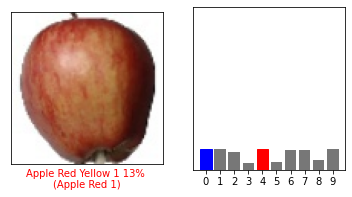

In [26]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

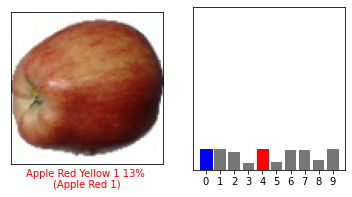

In [27]:
i = 151
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

### shuffle test data

In [28]:
from sklearn.utils import shuffle
X_shuffled,y_shuffled,predictions_shuffled = shuffle(X_test, y_test,predictions, random_state=0)

### plot several images with their predictions

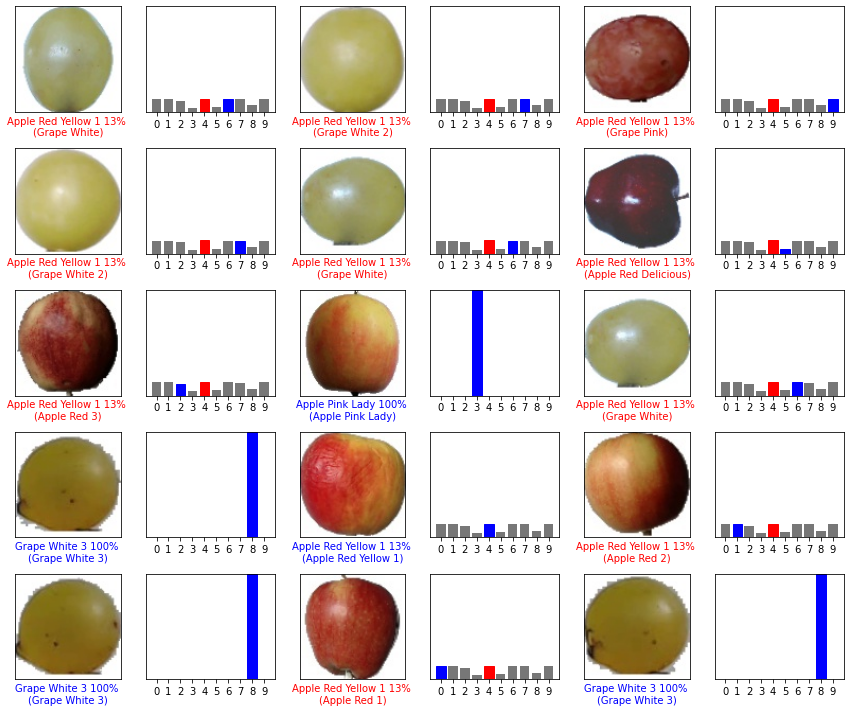

In [30]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions_shuffled[i], y_shuffled, X_shuffled)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions_shuffled[i], y_shuffled)
plt.tight_layout()
plt.savefig('test.png', bbox_inches='tight')
plt.show()

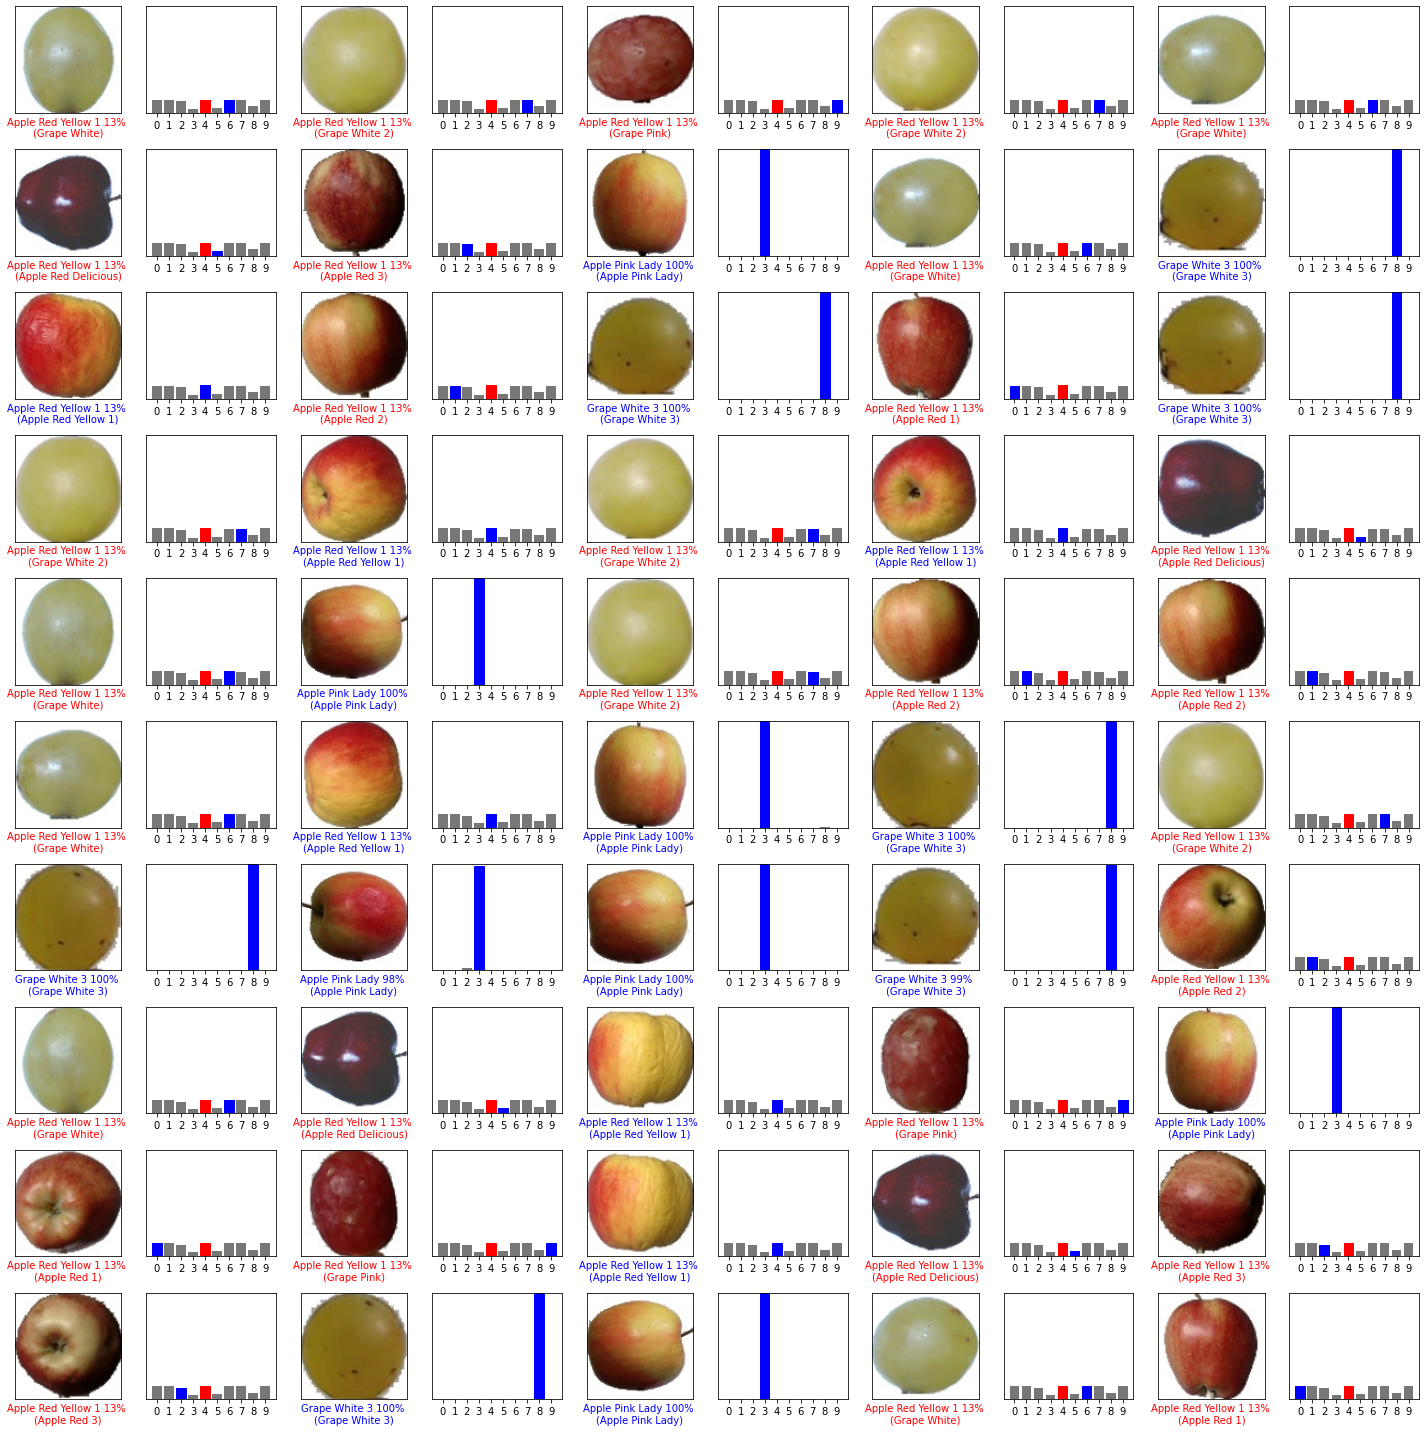

In [31]:
num_rows = 10
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions_shuffled[i], y_shuffled, X_shuffled)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions_shuffled[i], y_shuffled)
plt.tight_layout()
#plt.savefig('test3.png', bbox_inches='tight')
plt.show()

### use trained model

In [32]:
def getAllFruitsm():
    fruits = []
    for fruit_path in glob.glob("C:/Users/bhupe/Desktop/My Project/*/fruits-360/test-multiple_fruits/*"):
        fruit = fruit_path.split("/")[-1]
        fruits.append(fruit)
    return fruits

getAllFruitsm()

['My Project\\3.Fruit_image_classification\\fruits-360\\test-multiple_fruits\\apple.jpg',
 'My Project\\3.Fruit_image_classification\\fruits-360\\test-multiple_fruits\\apples1.jpg',
 'My Project\\3.Fruit_image_classification\\fruits-360\\test-multiple_fruits\\apples2.jpg',
 'My Project\\3.Fruit_image_classification\\fruits-360\\test-multiple_fruits\\apples3.jpg',
 'My Project\\3.Fruit_image_classification\\fruits-360\\test-multiple_fruits\\apples4.jpg',
 'My Project\\3.Fruit_image_classification\\fruits-360\\test-multiple_fruits\\apples_peaches1.jpg',
 'My Project\\3.Fruit_image_classification\\fruits-360\\test-multiple_fruits\\apples_peaches2.jpg',
 'My Project\\3.Fruit_image_classification\\fruits-360\\test-multiple_fruits\\apples_pears.jpg',
 'My Project\\3.Fruit_image_classification\\fruits-360\\test-multiple_fruits\\apple_apricot_nectarine_peach_peach(flat)_pomegranate_pear_plum.jpg',
 'My Project\\3.Fruit_image_classification\\fruits-360\\test-multiple_fruits\\apple_apricot_peach

In [33]:
fruitsm = ['apple_grape']

In [34]:
X_testm, y_testm = getYourFruits(fruitsm, 'test-multiple_fruits', print_n=True, k_fold=False)

There are  0   TEST-MULTIPLE_FRUITS  images of  APPLE_GRAPE


In [39]:
img = X_test[1]

print(img.shape)

(100, 100, 3)


In [40]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 100, 100, 3)


In [42]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[0.12409567 0.12411691 0.10751244 0.03878905 0.12516391 0.04804278
  0.12353862 0.12249433 0.06202313 0.12422317]]


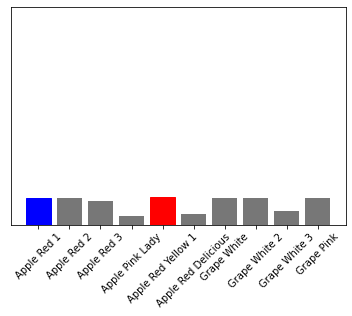

In [44]:
plot_value_array(0, predictions_single[0], y_test)
_ = plt.xticks(range(10), fruits, rotation=45)

In [47]:
np.argmax(predictions_single[0])

4